Data Analysis for Microsoft Studios

Name: Chemutai Annolyne
Class: PartTime


Overview

Objective: The objective is to examine data on movies, determine why such movies perform they way they do, and recommend the best types of movies MICROSOFT's new studio should produce to increase business returns and profitability.

Data Sets: 

I have two datasets obtained from the above sites for this analysis. The data sets are named  *bom.movie_gross.csv (obtained from Box Office Mojo website), and tmdb_movies.csv (obtained from TheMovieDB website).

The information helps us to understand movie performance, genres/combinations of genres that perform better in the box office, and whether production costs and release dates influence movie performance.

The datasets are suitable for the analysis as they provide information on the following:

1.Production budgets

2.Best perfoming Studios

3.Gross earnings (both domestic and worldwide)

4.Release Dates

REQUIRMENTS

1. Import Relevant Modules

2. Read the Dataset and its structure

3. Data Wrangling/Cleaning

4. Data Analysis and visualization

5. Recommendation to Microsoft 



In [1]:
#Import the nessecary tools for analysing data with python

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Lets Explore the differents Data sets

Dataset 1: 'bom.movie_gross.csv '

In [2]:
#Read the files path and data structure
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
bom_movie_gross.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Data wrangling  
#check for missing values and data in different columns

bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#removing unnessecary columns
bom_movie_gross = bom_movie_gross[['title', 'studio']]
bom_movie_gross

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


In [5]:
#Checking for duplicate values

if bom_movie_gross.duplicated().any():
    print('There are duplicates in this dataset')
else:
    print('There are no duplicates in this dataset')

There are no duplicates in this dataset


In [6]:
#checking for Missing Values in the dataset
bom_missing_values = bom_movie_gross.isna()
bom_missing_values

#checking whether any records return true for missing values
if bom_missing_values.any(axis=None):
    print('There are missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are missing values in this dataset


There are presence of missing values . better parctice to drop them not skew up the data 


In [7]:
#dropping records with atleast one missing value
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


In [8]:
#setting the title as the index for this dataset
bom_movie_gross.set_index('title', inplace=True)
bom_movie_gross

,studio
title,
Toy Story 3,BV
Alice in Wonderland (2010),BV
Harry Potter and the Deathly Hallows Part 1,WB
Inception,WB
Shrek Forever After,P/DW
...,...
The Quake,Magn.
Edward II (2018 re-release),FM
El Pacto,Sony


Dataset 2: 'tn.movie_budgets.csv'

In [9]:
#loading the tn.movie.budget.tsv dataset into a movie_budgets variable 
#and reviewing the first 10 rows of data

movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We need to rename the movie column to match the other datasets. The new column name will be title as used in the other data set bom.movie

In [10]:
#Reaname movie to tittle
movie_budgets = movie_budgets.rename(columns={'movie': 'title'})
movie_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
#Data cleaning 
#check any missing values? 
#What data types are we dealing with?

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
#Placeholders
#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(np.int64)

#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [13]:
#Checking for duplicates
if movie_budgets.duplicated().any():
    print('There are duplicates in this dataset')
else:
    print('There are no duplicates in this dataset')

There are no duplicates in this dataset


We need to set the title as the index, essentially making the movie titles the primary way to reference and organize the data in the DataFrame.

In [14]:
#setting the movie column to be the index

movie_budgets.set_index('title', inplace=True)
movie_budgets


,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018",7000,0,0
Following,79,"Apr 2, 1999",6000,48482,240495
Return to the Land of Wonders,80,"Jul 13, 2005",5000,1338,1338


COMBINING THE TWO DATA SETS 

'bom.movie_gross.csv ' AND 'tn.movie_budgets.csv'


This new dataset will be assigned to the variable combined_movie_data for further cleaning and analysis. The combined_movie_data will return only records with matching title.

In [15]:
#joining movie_budgets and movie_data datasets
combined_movie_data= movie_budgets .join(bom_movie_gross , how='inner')
combined_movie_data.head()


,id,release_date,production_budget,domestic_gross,worldwide_gross,studio
title,,,,,,
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,Par.
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,WB
12 Years a Slave,18,"Oct 18, 2013",20000000,56671993,181025343,FoxS
127 Hours,6,"Nov 5, 2010",18000000,18335230,60217171,FoxS
13 Hours: The Secret Soldiers of Benghazi,30,"Jan 15, 2016",50000000,52853219,69411370,Par.


In [16]:
#reviewing the columns for this data
combined_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 10 Cloverfield Lane to mother!
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1246 non-null   int64 
 1   release_date       1246 non-null   object
 2   production_budget  1246 non-null   int64 
 3   domestic_gross     1246 non-null   int64 
 4   worldwide_gross    1246 non-null   int64 
 5   studio             1246 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.1+ KB


In [17]:
#sorting the dataset based on worldwide_gross column
combined_movie_data = combined_movie_data.sort_values('worldwide_gross', ascending=False)
combined_movie_data

,id,release_date,production_budget,domestic_gross,worldwide_gross,studio
title,,,,,,
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,BV
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Uni.
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Uni.
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,BV
Black Panther,42,"Feb 16, 2018",200000000,700059566,1348258224,BV
...,...,...,...,...,...,...
Skin Trade,19,"May 8, 2015",9000000,1242,1242,Magn.
Snitch,52,"Dec 31, 2012",850000,0,0,LG/S
Eden,66,"Jan 19, 2016",2300000,0,0,BG


Next is restructure combined data further, by replacing the genre_ids values with the respective genre names and separating the release_date column to year and month columns. We will also remove the id column from the dataset because it is unnesseary for the analysis.

First, we need to drop the id column from the dataset

In [18]:
#removing the id column from the dataset
combined_movie_data.drop('id', axis=1, inplace=True)
combined_movie_data

,release_date,production_budget,domestic_gross,worldwide_gross,studio
title,,,,,
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,BV
Jurassic World,"Jun 12, 2015",215000000,652270625,1648854864,Uni.
Furious 7,"Apr 3, 2015",190000000,353007020,1518722794,Uni.
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,BV
Black Panther,"Feb 16, 2018",200000000,700059566,1348258224,BV
...,...,...,...,...,...
Skin Trade,"May 8, 2015",9000000,1242,1242,Magn.
Snitch,"Dec 31, 2012",850000,0,0,LG/S
Eden,"Jan 19, 2016",2300000,0,0,BG


In [19]:
# Creating new columns for month and year
combined_movie_data['year'] = combined_movie_data['release_date'].str[-4:].astype(int)
combined_movie_data['month'] = combined_movie_data['release_date'].str[:3]

# Dropping the release_date column
combined_movie_data.drop('release_date', axis=1, inplace=True)

combined_movie_data

,production_budget,domestic_gross,worldwide_gross,studio,year,month
title,,,,,,
Avengers: Infinity War,300000000,678815482,2048134200,BV,2018,Apr
Jurassic World,215000000,652270625,1648854864,Uni.,2015,Jun
Furious 7,190000000,353007020,1518722794,Uni.,2015,Apr
Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,May
Black Panther,200000000,700059566,1348258224,BV,2018,Feb
...,...,...,...,...,...,...
Skin Trade,9000000,1242,1242,Magn.,2015,May
Snitch,850000,0,0,LG/S,2012,Dec
Eden,2300000,0,0,BG,2016,Jan


In [20]:
#removing domestic gross
combined_movie_data.drop('domestic_gross', axis=1, inplace=True)
combined_movie_data.head()

,production_budget,worldwide_gross,studio,year,month
title,,,,,
Avengers: Infinity War,300000000,2048134200,BV,2018,Apr
Jurassic World,215000000,1648854864,Uni.,2015,Jun
Furious 7,190000000,1518722794,Uni.,2015,Apr
Avengers: Age of Ultron,330600000,1403013963,BV,2015,May
Black Panther,200000000,1348258224,BV,2018,Feb


Combined Data is clean and now we proceed to analysing.

EXPLAROTARY DATA ANALYSIS

Visualization
1. Focus will be on comparisons between top movies and bottom movies in terms of genres, release month, studio, popularity, vote_count, and vote_average.

Visualizations will help identify some of these relationships and what they mean to Microsoft's production studio. For example, is there a correlation between popularity and box office? Other questions would be, does the release month affect the popularity and movies' box office? And are there any relationships between production costs, popularity, and worldwide grossing.

We are trying to answer below questions

1.Production Budget vs Box Office figures
2.Understanding the relationship between production budgets and worldwide gross can help predict, to some level, whether investing more in movie production will result in high grosses.

As a result, an horizontal bar chart that compares costs vs revenues for the top 30 and bottom 20 movies will be appropriate for this analysis.

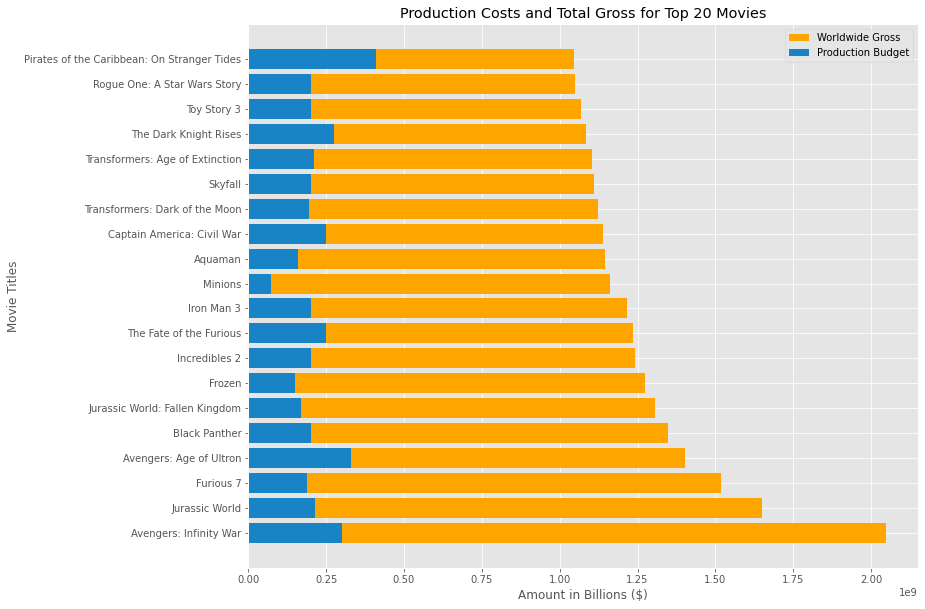

In [21]:
# Getting the top 20 movies
top_20_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(20)

#reset the index for top_20_movies
top_20_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.barh(top_20_movies['title'], top_20_movies['worldwide_gross'], label='Worldwide Gross', color='orange')
ax.barh(top_20_movies['title'], top_20_movies['production_budget'], label='Production Budget', color='#1984c5')

# Set the axis labels and title
ax.set_xlabel('Amount in Billions ($)')
ax.set_ylabel('Movie Titles')
ax.set_title('Production Costs and Total Gross for Top 20 Movies')

# Add a legend
ax.legend()

# Show the plot
plt.show();

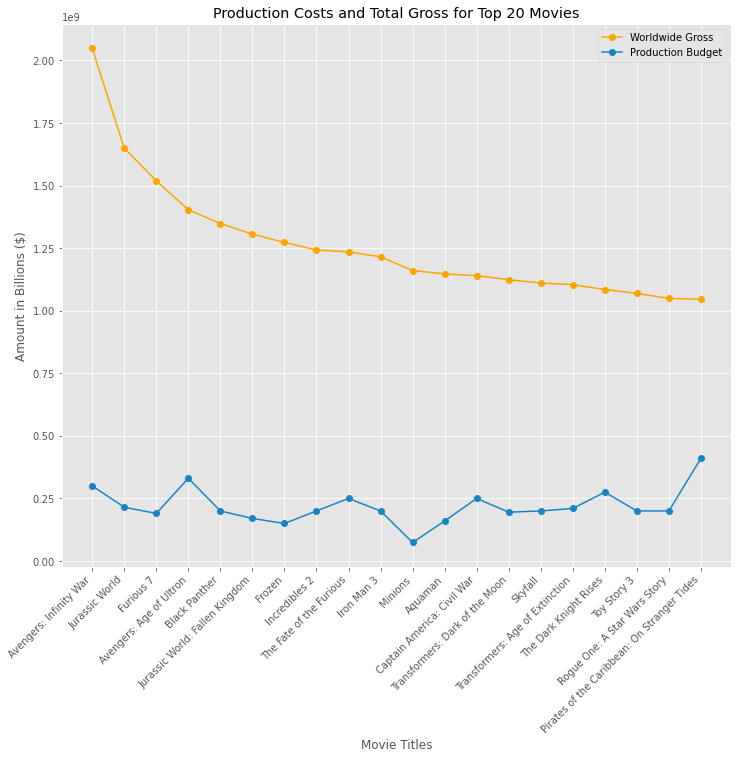

In [22]:
# Getting the top 20 movies
top_20_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(20)

# Reset the index for top_20_movies
top_20_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data as a line graph
ax.plot(top_20_movies['title'], top_20_movies['worldwide_gross'], marker='o', label='Worldwide Gross', color='orange')
ax.plot(top_20_movies['title'], top_20_movies['production_budget'], marker='o', label='Production Budget', color='#1984c5')

# Set the axis labels and title
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Amount in Billions ($)')
ax.set_title('Production Costs and Total Gross for Top 20 Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.show()

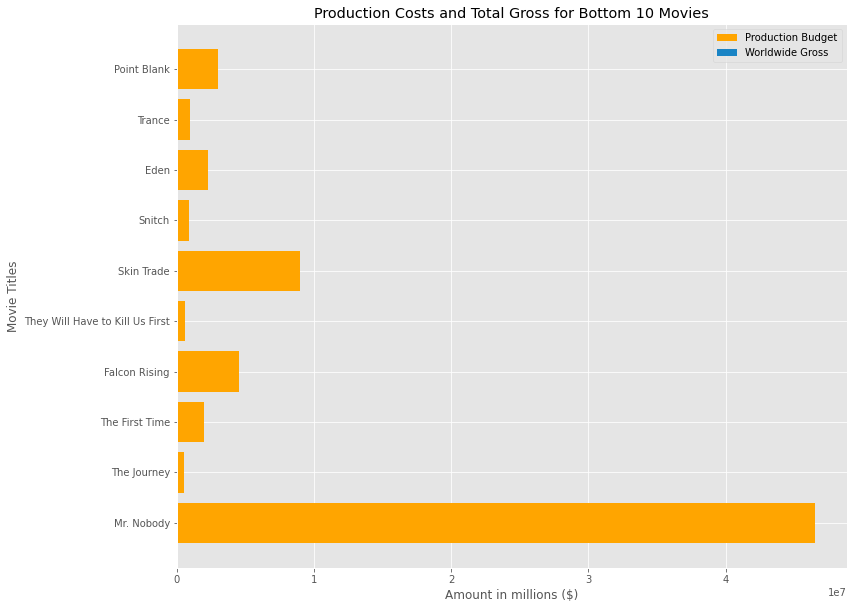

In [23]:
# Getting the top 10 movies
bottom_10_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).tail(10)

#reset the index for top_10_movies
bottom_10_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.barh(bottom_10_movies['title'], bottom_10_movies['production_budget'], label='Production Budget', color='orange')
ax.barh(bottom_10_movies['title'], bottom_10_movies['worldwide_gross'], label='Worldwide Gross', color='#1984c5')

# Set the axis labels and title
ax.set_xlabel('Amount in millions ($)')
ax.set_ylabel('Movie Titles')
ax.set_title('Production Costs and Total Gross for Bottom 10 Movies')

# Add a legend
ax.legend()

# Show the plot
plt.show();

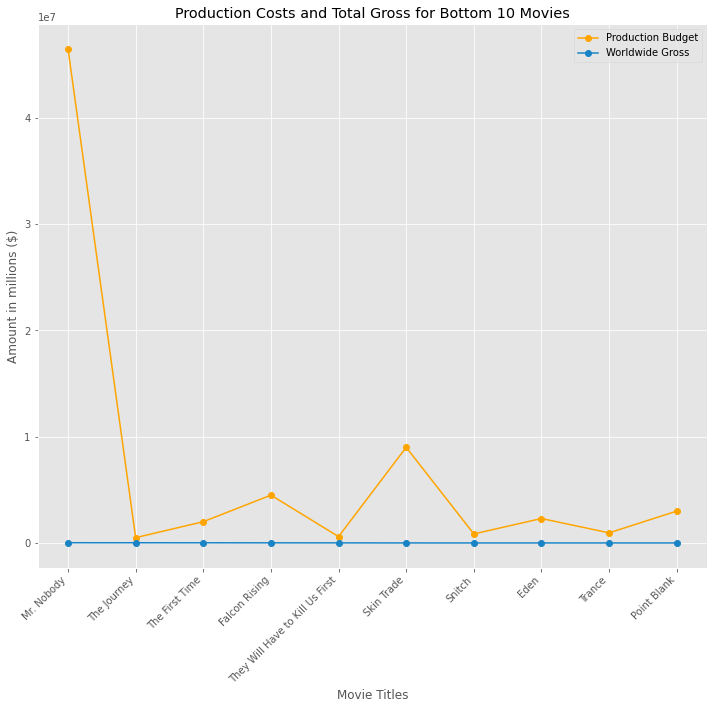

In [24]:
# Getting the top 10 movies
bottom_10_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).tail(10)

# Reset the index for bottom_10_movies
bottom_10_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data as a line graph
ax.plot(bottom_10_movies['title'], bottom_10_movies['production_budget'], marker='o', label='Production Budget', color='orange')
ax.plot(bottom_10_movies['title'], bottom_10_movies['worldwide_gross'], marker='o', label='Worldwide Gross', color='#1984c5')

# Set the axis labels and title
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Amount in millions ($)')
ax.set_title('Production Costs and Total Gross for Bottom 10 Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Monthly Release Dates for the top 100 Movies


Here, we need to understand which month saw the release of the most movies from the top 200 list. This will help in comparing whether the release month plays any role on a movie's audience reception

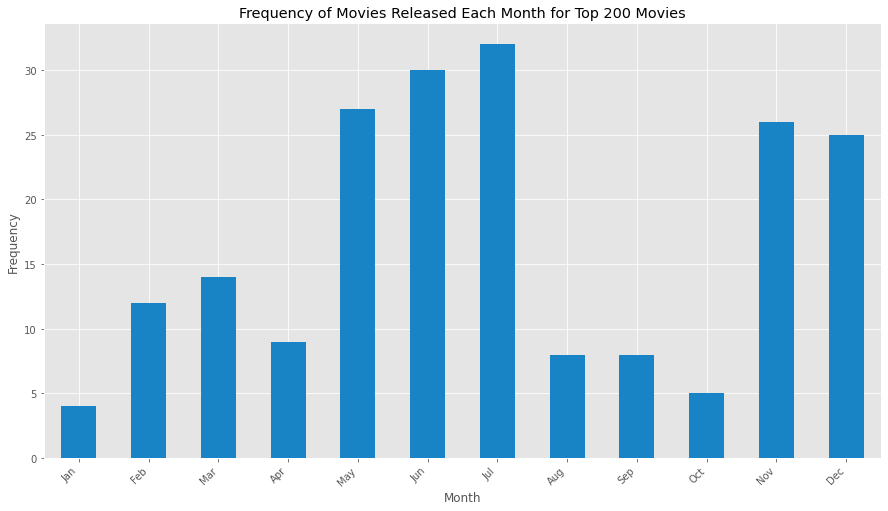

In [25]:
# Get the top 200 movies
top_200_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(200)

# Reset the index for this dataframe
top_200_movies.reset_index(drop=True, inplace=True)

# Group the movies by month and count the number of movies in each month
movies_by_month = top_200_movies['month'].value_counts().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data as a bar chart
movies_by_month.plot(kind='bar', color='#1984c5', ax=ax)

# Set the x-axis tick locations and labels
ax.set_xticklabels(movies_by_month.index, rotation=45, ha='right')

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Movies Released Each Month for Top 200 Movies')

# Show the plot
plt.show()

Studios with the Highest number of Movies in Top 250 List

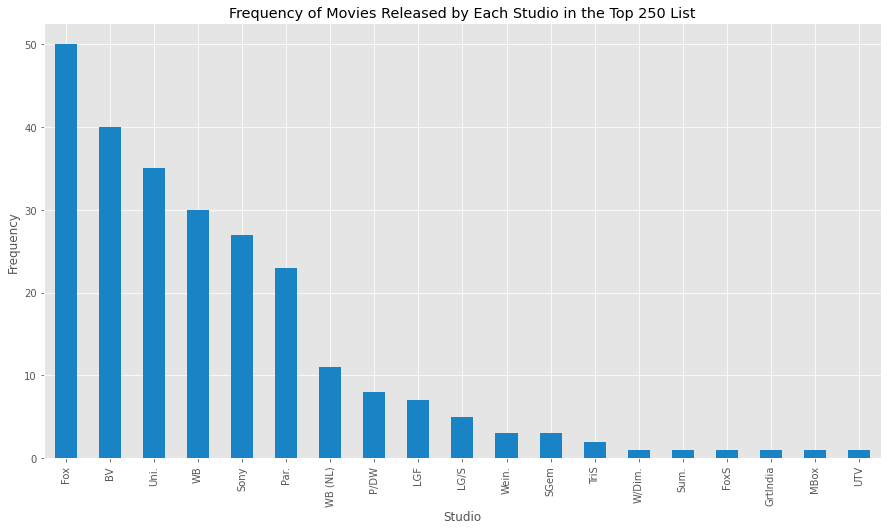

In [26]:
# Getting the top 250 movies
top_250_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(250)

# Reset the index for this dataframe
top_250_movies.reset_index(drop=True, inplace=True)

# Group the movies by studio and count the number of movies by each studio
movies_by_studio = top_250_movies['studio'].value_counts()

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data as a bar chart
movies_by_studio.plot(kind='bar', color='#1984c5', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Studio')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Movies Released by Each Studio in the Top 250 List')

# Show the plot
plt.show()

In [27]:
top_250_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(250)

# Reset the index for this dataframe
top_250_movies.reset_index(drop=True, inplace=True)

# Get the unique studio names
studio_names = top_250_movies['studio'].unique()

# Print the studio names
print("Studio Names:")
for studio in studio_names:
    print(studio)

Studio Names:
BV
Uni.
WB
P/DW
Sony
Par.
WB (NL)
Fox
LGF
Sum.
Wein.
LG/S
FoxS
SGem
UTV
TriS
GrtIndia
W/Dim.
MBox


 Recommendations based on Analysis
 
 Analysis reveals significant correlations between various factors, indicating opportunities for Microsoft's new studio to thrive in the film industry.

The examination aimed to uncover relationships between production costs and box office performance, release month and box office performance, as well as production studio and box office performance. Results and visualizations suggest a strong association between production studio and performance. However, correlations are notably weaker regarding production budget and release month.

Based on these findings, I propose four strategic actions for Microsoft's movie development process, listed in order of priority:

1.Forge Partnerships: Collaborate with established production studios. Fox emerges as the frontrunner, boasting approximately 49 movies in the top 250, closely trailed by (BV) Pictures—a subsidiary of Walt Disney Studios—with 44 movies. Following suit are Uni studios with 39 movies, (WB) Pictures with 28 movies, alongside Sony and Par Pictures with 25 and 23 respectively. These studios represent key players that have effectively dominated the market, consistently delivering highest-grossing films. Their success translates to substantial profits for parent companies and shareholders. Consequently, they offer valuable opportunities for Microsoft Studios to glean insights from or potentially collaborate with.

2.Consider Production Costs: While of lower priority, Microsoft's new studio should factor in production costs. Avoiding movies with budgets below $100 million is advisable, as they often yield minimal or negative returns.

3.Optimize Release Timing: Explore releasing movies during peak months for box office success, such as May, June, July, and November and December. These months typically witness the release of highest-grossing films, indicating increased audience engagement. Collaborating with seasoned studios can provide valuable insights into the factors driving audience behavior during these periods.

4.Evaluate Additional Factors: Explore additional factors beyond the scope of this analysis that may influence box office performance, such as marketing strategies, audience demographics, and critical reception. Incorporating these considerations into the movie development process can further improve Microsoft's chances of success.

